In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.datasets import load_boston

In [15]:
boston_dataset = load_boston()
print(boston_dataset.feature_names)
b = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
b.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
b["MEDV"] = boston_dataset.target
b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
b.describe().head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000


In [20]:
sns.set()

In [22]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
b[feature_names] = scaler.fit_transform(boston[feature_names])
b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


變數相關

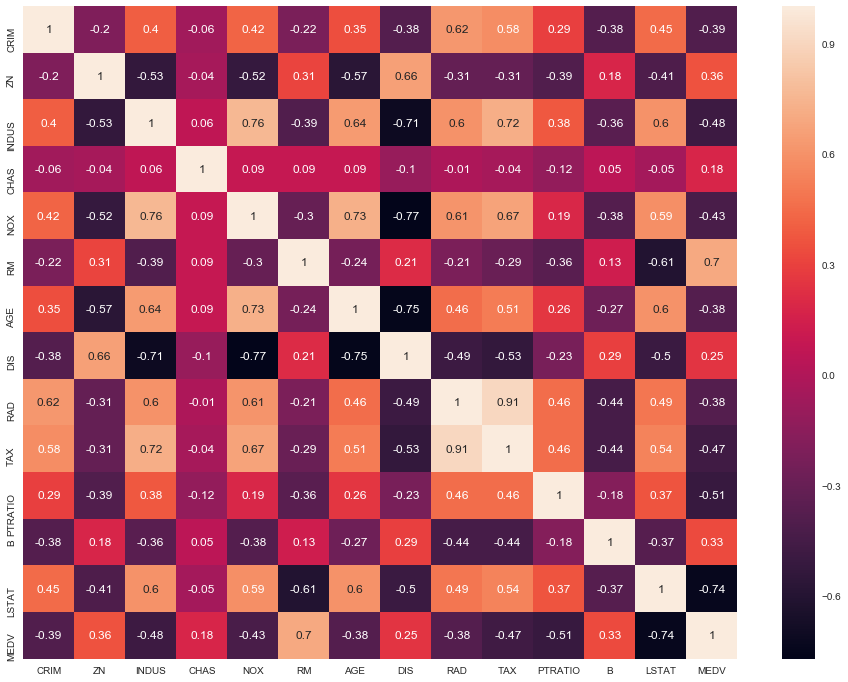

In [25]:
c = b.corr().round(2)
plt.figure(figsize=(16,12))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(c,annot = True)

## features describe

1. CRIM:城鎮人均犯罪率
2. ZN:住宅用地所佔比例
3. INDUS:每個城鎮中非商業用地佔比例
4. CHAS:Charles River虛擬變量（如果是河道，則為1;否則為0
5. NOX:一氧化氮濃度（每千萬份
6. RM:每棟住宅房間數
7. AGE:1940年以前建造的自住單位比例
8. DIS:波士頓的五個就業中心加權距離
9. RAD:徑向高速公路的可達性指數
10. TAX:每一萬美元的不動產稅率
11. PTRATIO:城鎮的學生與教師比例
12. B:城鎮中黑人比例
13. LSTAT:房東屬於低等收入階層比例
#### 取1, 3, 5, 7, 9, 11, 13 , MEDV

In [27]:
r_b = b[['CRIM','ZN','NOX','AGE','RAD','LSTAT','MEDV']]
r_b

,CRIM,ZN,NOX,AGE,RAD,LSTAT,MEDV
0,-0.417713,0.284830,-0.144217,-0.120013,-0.982843,-1.075562,24.0
1,-0.415269,-0.487722,-0.740262,0.367166,-0.867883,-0.492439,21.6
2,-0.415272,-0.487722,-0.740262,-0.265812,-0.867883,-1.208727,34.7
3,-0.414680,-0.487722,-0.835284,-0.809889,-0.752922,-1.361517,33.4
4,-0.410409,-0.487722,-0.835284,-0.511180,-0.752922,-1.026501,36.2
5,-0.414974,-0.487722,-0.835284,-0.351157,-0.752922,-1.043322,28.7
6,-0.408169,0.048772,-0.265154,-0.070229,-0.523001,-0.031268,22.9
7,-0.401618,0.048772,-0.265154,0.978808,-0.523001,0.910700,27.1
8,-0.393853,0.048772,-0.265154,1.117494,-0.523001,2.421774,16.5
9,-0.398650,0.048772,-0.265154,0.616090,-0.523001,0.623344,18.9


In [28]:
X = r_b.loc[:, 'CRIM':'LSTAT'].values
Y = r_b.MEDV

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [33]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

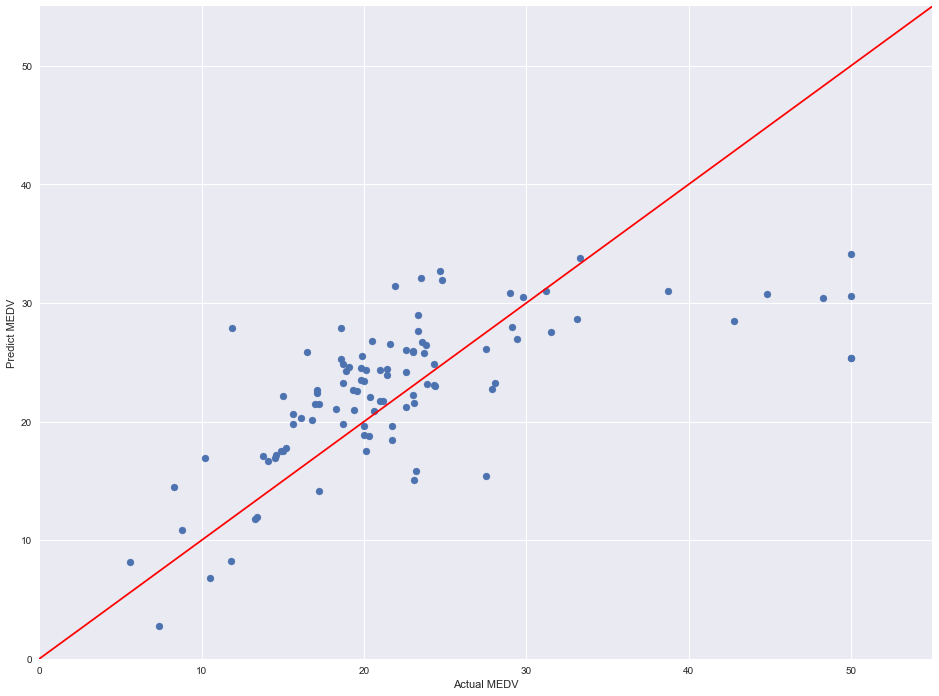

In [34]:
sns.set()

plt.figure(figsize=(16,12))
plt.scatter(y_test, y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
plt.plot([0,55], [0,55], "r")